In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O2','C2']
psi_dihedral=['C1','O2','C2','C3']

di_sugar=['XYP', 'BMA']
di_sugar2= ['DXylpb', 'DManpb']
link= '1-2'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/b1-2D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1CF5', '1CF5', '1CPO', '1CVI', '1DN2', '1DN2', '1DP5', '1DPJ', '1DWA', '1DWA', '1DWF', '1DWF', '1DWG', '1DWG', '1DWH', '1DWH', '1DWI', '1DWI', '1DWJ', '1DWJ', '1E05', '1E4K', '1E4K', '1E4M', '1E4M', '1E6Q', '1E6Q', '1E6S', '1E6S', '1E6X', '1E6X', '1E70', '1E70', '1E71', '1E71', '1E72', '1E72', '1E73', '1E73', '1EOM', '1EX1', '1F8Q', '1FC1', '1FC1', '1FC2', '1FQ4', '1FQ7', '1FRT', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G9F', '1H3V', '1H3V', '1H3W', '1H3X', '1H3X', '1H3Y', '1H3Y', '1H4P', '1H4P', '1HD4', '1HZH', '1HZH', '1I1A', '1I1A', '1I1C', '1I1C', '1IEQ', '1IEW', '1IEX', '1IGT', '1IGT', '1IGY', '1IGY', '1IQQ', '1J8V', '1K9I', '1K9I', '1K9I', '1K9I', '1K9I', '1K9J', '1KJ2', '1L6X', '1LGB', '1LGC', '1LGC', '1LGC', '1LOF', '1LOF', '1LQ2', '1LTE', '1MCO', '1MYR', '1MYR', '1OQO', '1OQO', '1OW0', '1OW0', '1OW0', '1OW0', '1P8J', '1PPF', '1PPG', '1RER', '1RER

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 78 
valid torsion1 and torsion2: (78, 78)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['4.D', '3.D'], ['4C1', '4C1'])
(['4.F', '3.F'], ['4C1', '4C1'])
(['307.B', '2.E'], ['4C1', '4C1'])
(['4.B', '3.B'], ['-', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['4.D', '3.D'], ['4C1', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '-'])
(['4.B', '3.B'], ['-', '4C1'])
(['4.C', '3.C'], ['4C1', '-'])
(['4.C', '3.C'], ['4C1', '-'])
(['4.B', '3.B'], ['-', '4C1'])
(['4.E', '3.E'], ['4C1', '-'])
(['4.C', '3.C'], ['4C1', '-'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['4.B', '3.B'], ['-', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['4.F', '3.F'], ['4C1', '4C1'])
(['4.E', '3.E'], ['4C1', '4C1'])
(['4.D', '3.D'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['309.B', '2.F'], ['-', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['4.E', '3.E'], ['4C1', '4C1'])
(['4.F', '3.F'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//6idn.pdb D XYP 4 C1
../../pdbs//6idn.pdb D BMA 3 O2
2311 2306
Connection found between 2311 and 2306
../../pdbs//5kxe.pdb F XYP 4 C1
../../pdbs//5kxe.pdb F BMA 3 O2
7508 7503
Connection found between 7508 and 7503
../../pdbs//4zlb.pdb B XYP 307 C1
../../pdbs//4zlb.pdb E BMA 2 O2
4087 4045
No connection found between 4087 and 4045
2
../../pdbs//1dwj.pdb B XYP 4 C1
../../pdbs//1dwj.pdb B BMA 3 O2
4152 4147
Connection found between 4152 and 4147
../../pdbs//1dwj.pdb C XYP 4 C1
../../pdbs//1dwj.pdb C BMA 3 O2
4210 4205
Connection found between 4210 and 4205
../../pdbs//2wxd.pdb D XYP 4 C1
../../pdbs//2wxd.pdb D BMA 3 O2
4237 4232
Connection found between 4237 and 4232
../../pdbs//1e72.pdb B XYP 4 C1
../../pdbs//1e72.pdb B BMA 3 O2
4151 4146
Connection found between 4151 and 4146
../../pdbs//1e72.pdb C XYP 4 C1
../../pdbs//1e72.pdb C BMA 3 O2
4209 4204
Connection found between 4209 and 4204
../../pdbs//1e6x.pdb B XYP 4 C1
../../pdbs//1e6x.pdb B BMA 3 O2
4151 4146
Connection foun

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,6idn.pdb,D XYP 4 C2 C1 BMA 3 O2 C2,D XYP 4 C1 BMA 3 O2 C2 C3,157.133,135.268,"([XYP(4_D_), BMA(3_D_)], [33.69, 37.58])",MAN(5_D_)-[XYP(4_D_)]-BMA(3_D_)-NAG(2_D_)-[FUC...,DXylpb1-2[DManpa1-3]DManpb1-4DGlcpNAcb1-4[LFuc...,"([4.D, 3.D], [4C1, 4C1])"
1,5kxe.pdb,F XYP 4 C2 C1 BMA 3 O2 C2,F XYP 4 C1 BMA 3 O2 C2 C3,161.444,125.337,"([XYP(4_F_), BMA(3_F_)], [59.22, 55.05])",MAN(6_F_)-[MAN(5_F_)]-[XYP(4_F_)]-BMA(3_F_)-NA...,DXylpb1-2[DManpa1-3][DManpa1-6]DManpb1-4DGlcpN...,"([4.F, 3.F], [4C1, 4C1])"
2,1dwj.pdb,B XYP 4 C2 C1 BMA 3 O2 C2,B XYP 4 C1 BMA 3 O2 C2 C3,153.990,134.819,"([XYP(4_B_), BMA(3_B_)], [69.38, 65.93])",XYP(4_B_)-BMA(3_B_)-NAG(2_B_)-[FUC(5_B_)]-NAG(...,DXylpb1-2DManpb1-4DGlcpNAcb1-4[LFucpa1-3]DGlcp...,"([4.B, 3.B], [-, 4C1])"
3,1dwj.pdb,C XYP 4 C2 C1 BMA 3 O2 C2,C XYP 4 C1 BMA 3 O2 C2 C3,147.628,122.522,"([XYP(4_C_), BMA(3_C_)], [62.34, 52.68])",MAN(6_C_)-[MAN(5_C_)]-[XYP(4_C_)]-BMA(3_C_)-NA...,DXylpb1-2[DManpa1-3][DManpa1-6]DManpb1-4DGlcpN...,"([4.C, 3.C], [4C1, 4C1])"
4,2wxd.pdb,D XYP 4 C2 C1 BMA 3 O2 C2,D XYP 4 C1 BMA 3 O2 C2 C3,170.194,128.771,"([XYP(4_D_), BMA(3_D_)], [38.77, 27.34])",MAN(6_D_)-[MAN(5_D_)]-[XYP(4_D_)]-BMA(3_D_)-NA...,DXylpb1-2[DManpa1-3][DManpa1-6]DManpb1-4DGlcpN...,"([4.D, 3.D], [4C1, 4C1])"
...,...,...,...,...,...,...,...,...,...
71,1dwi.pdb,C XYP 4 C2 C1 BMA 3 O2 C2,C XYP 4 C1 BMA 3 O2 C2 C3,151.777,136.596,"([XYP(4_C_), BMA(3_C_)], [59.85, 50.19])",MAN(6_C_)-[MAN(5_C_)]-[XYP(4_C_)]-BMA(3_C_)-NA...,DXylpb1-2[DManpa1-3][DManpAa1-6]DManpb1-4DGlcp...,"([4.C, 3.C], [4C1, -])"
72,3wlh.pdb,D XYP 4 C2 C1 BMA 3 O2 C2,D XYP 4 C1 BMA 3 O2 C2 C3,155.271,124.069,"([XYP(4_D_), BMA(3_D_)], [52.37, 62.69])",XYP(4_D_)-BMA(3_D_)-NAG(2_D_)-[FUL(5_D_)]-NAG(...,DXylpb1-2DManpb1-4DGlcpNAcb1-4[LFucpb1-3]DGlcp...,"([4.D, 3.D], [4C1, 4C1])"
73,4a5g.pdb,C XYP 4 C2 C1 BMA 3 O2 C2,C XYP 4 C1 BMA 3 O2 C2 C3,161.102,141.442,"([XYP(4_C_), BMA(3_C_)], [44.83, 45.9])",MAN(5_C_)-[XYP(4_C_)]-BMA(3_C_)-NAG(2_C_)-[FUC...,DXylpb1-2[DManpa1-3]DManpb1-4DGlcpNAcb1-4[LFuc...,"([4.C, 3.C], [4C1, 4C1])"
74,4a5g.pdb,G XYP 4 C2 C1 BMA 3 O2 C2,G XYP 4 C1 BMA 3 O2 C2 C3,145.088,149.684,"([XYP(4_G_), BMA(3_G_)], [64.74, 61.59])",BMA(5_G_)-[XYP(4_G_)]-BMA(3_G_)-NAG(2_G_)-[FUL...,DXylpb1-2[DManpb1-3]DManpb1-4DGlcpNAca1-4[LFuc...,"([4.G, 3.G], [4C1, 4C1])"


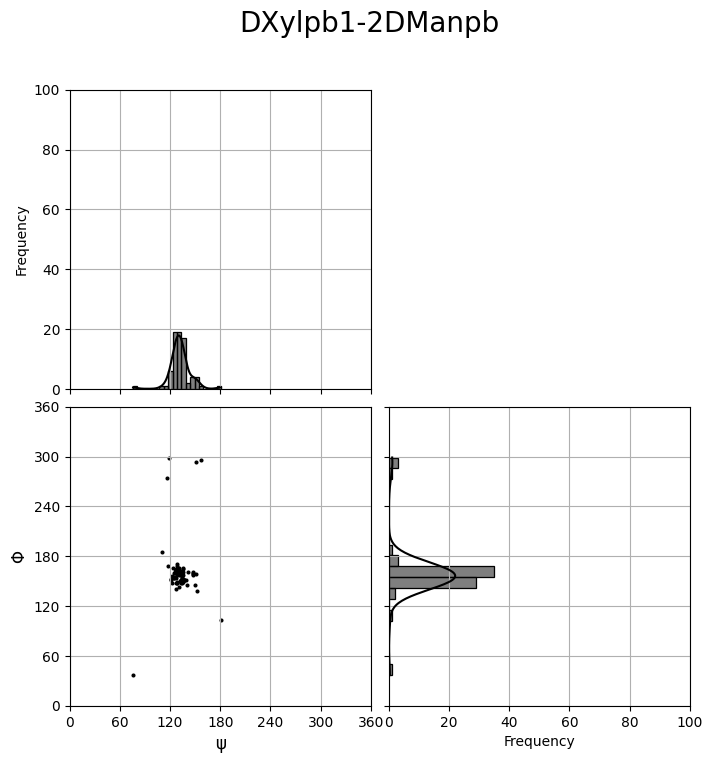

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)